<a href="https://colab.research.google.com/github/yeanni-w0n/esaa_assignment_yw01/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_0315_p_108~146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **시각화 도구**

**Matplotlib**

데이터 분석에서 다루는 데이터의 종류는 매우 다양함. 데이터의 크기도 굉장히 많은데 판다스는 데이터 시각화가 풍부하게 내장되어있지 않기 때문에 Matlotlib를 이용해서 객체지향 프로그래밍을 구현함.

In [ ]:
#선그래프

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/Colab ESAA/시도별전출입인구수.xlsx', engine= 'openpyxl', header=0)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


method의 ffill 옵션을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채울 수 있음

In [ ]:
#누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df=df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출해서 정리
mask=(df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [ ]:
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택

sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

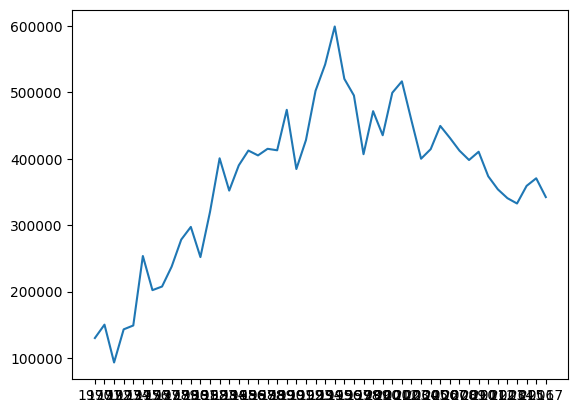

In [ ]:
#x,y축 데이터를 plot 함수에 입력

plt.plot(sr_one.index, sr_one.values)

시리즈 또는 데이터프레임 객체를 plot() 함수에 직접 입력하는 것 가능

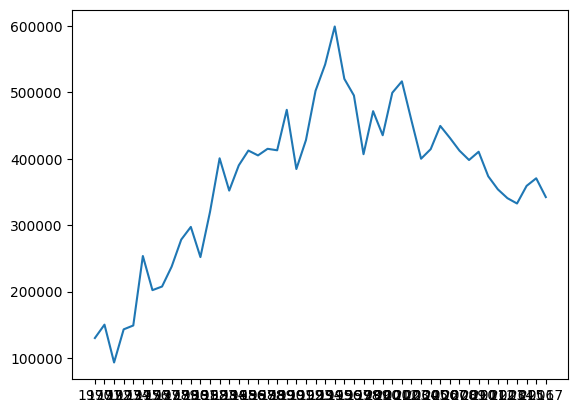

In [ ]:
#판다스 객체를 plot 함수에 입력

plt.plot(sr_one)

- 차트 제목, 축 이름 추가 : title() 함수 사용

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

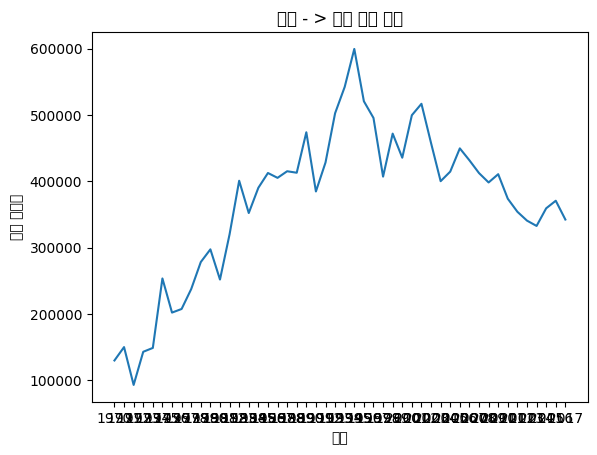

In [ ]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 - > 경기 인구 이동' )

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

- Matplotlib 한글 폰트 오류 해결

---
네모 박스 모양으로 표현되며 한글 폰트는 깨지게 됨



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 맥 OS 사용시 한글 폰트 지정 방법


---


from matplotlib import rc/
rc('font', family='AppleGothic')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


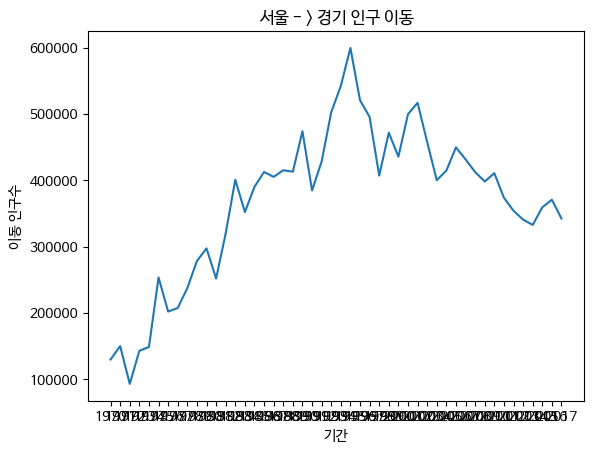

In [ ]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

#누락값(NaN)을 앞 데이터로 채움(엑셀 양식병합부분)
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 - > 경기 인구 이동' )

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() #변경사항 저장하고 그래프 출력

 **그래프 꾸미기**


---


글씨가 들어갈 수 있는 공간 확보
  - figure() : 그림틀의 가로 사이즈 더 크게 설정
  - xtick() : x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 서로 겹치지 않게 하기

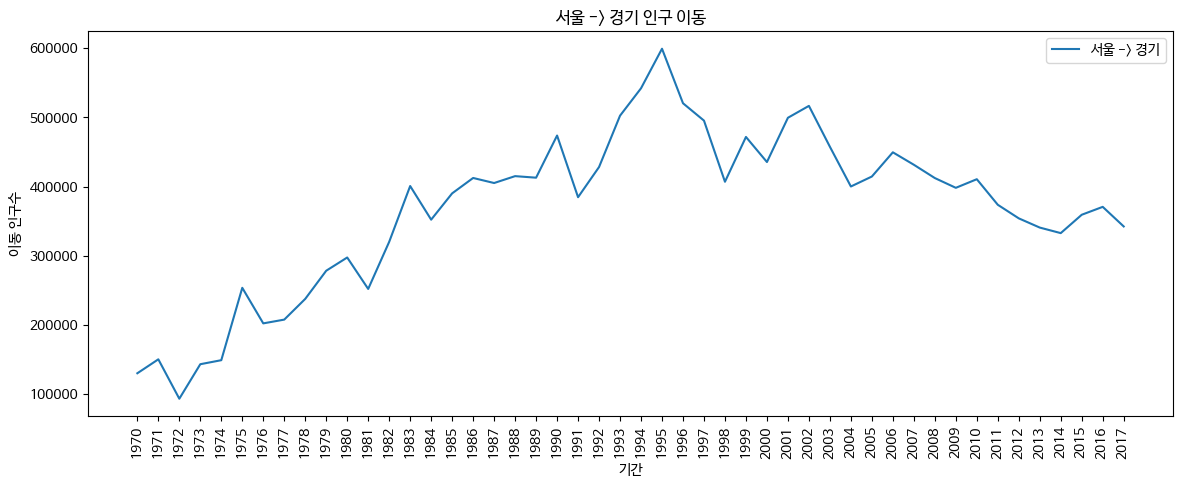

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                   #x축 이름
plt.ylabel('이동 인구수')            #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

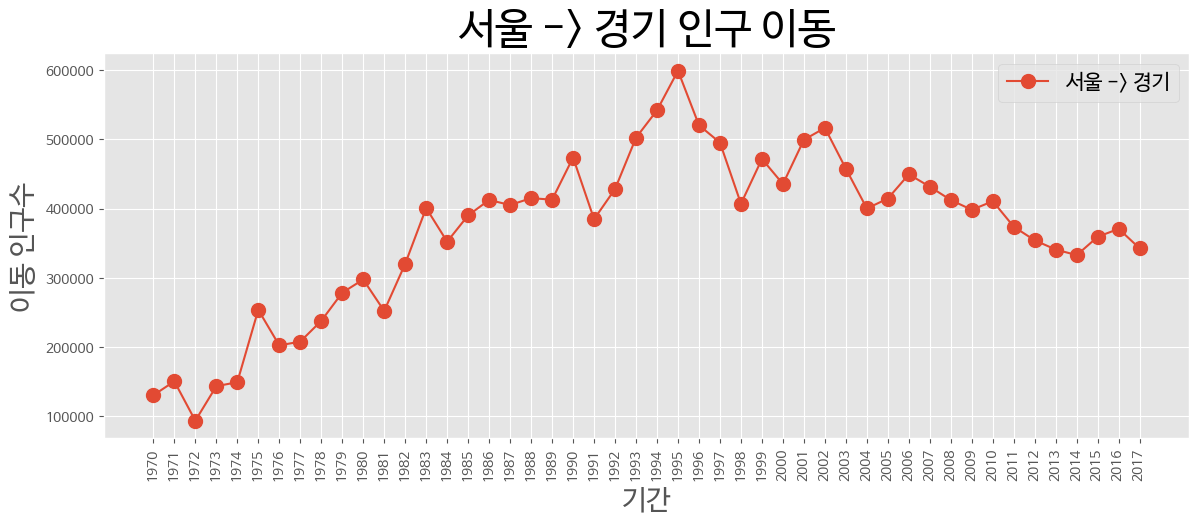

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

#각각 차트제목, x축, y축 이름
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


그래프에 덧붙이는 주석: annotate()

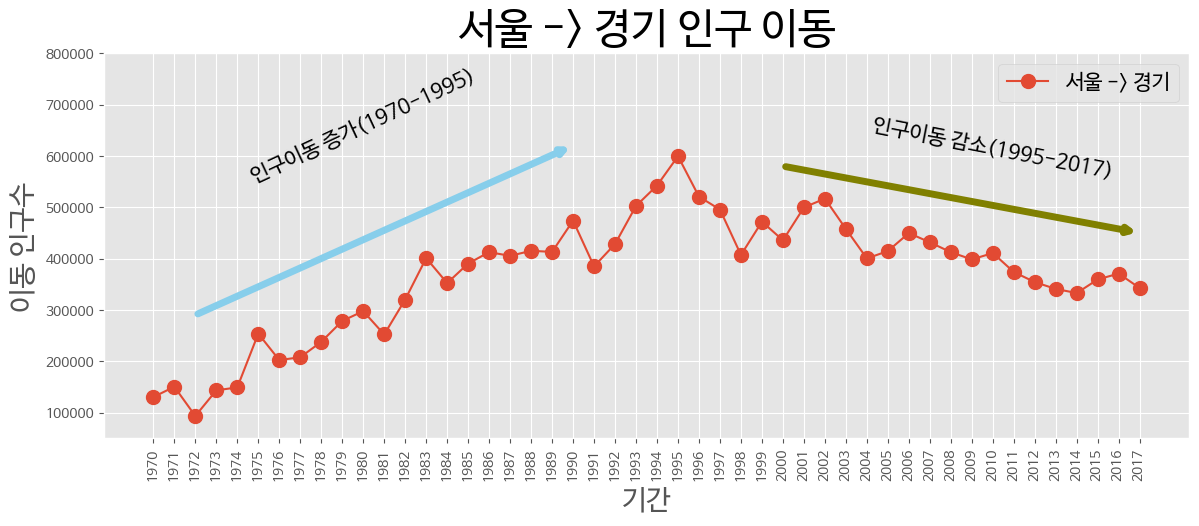

In [ ]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

#범례표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소, 최대)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),
             xytext=(2, 290000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),
             )

plt.annotate('',
             xy=(47, 450000),
             xytext=(30, 580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',
             xy=(10, 550000),
             va='baseline',
             ha='center',
             fontsize=15,
             )
plt.annotate('인구이동 감소(1995-2017)',
             xy=(40, 560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15,
             )

plt.show()

**화면 분할하여 그래프 여러개 그리기**- **axe 객체 활용**

---


  - figure() 함수 : 그래프를 그리는 그림틀(fig)을 만들기
  - figsize 옵션 : 그림틀의 크기 설정
  - fig 객체에 add_subplot() 메소드 적용해 그림틀 여러개로 분할 -> 나눠진 각 부분 : axe 객체

<ipython-input-16-bae5fb5c0b92>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-16-bae5fb5c0b92>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


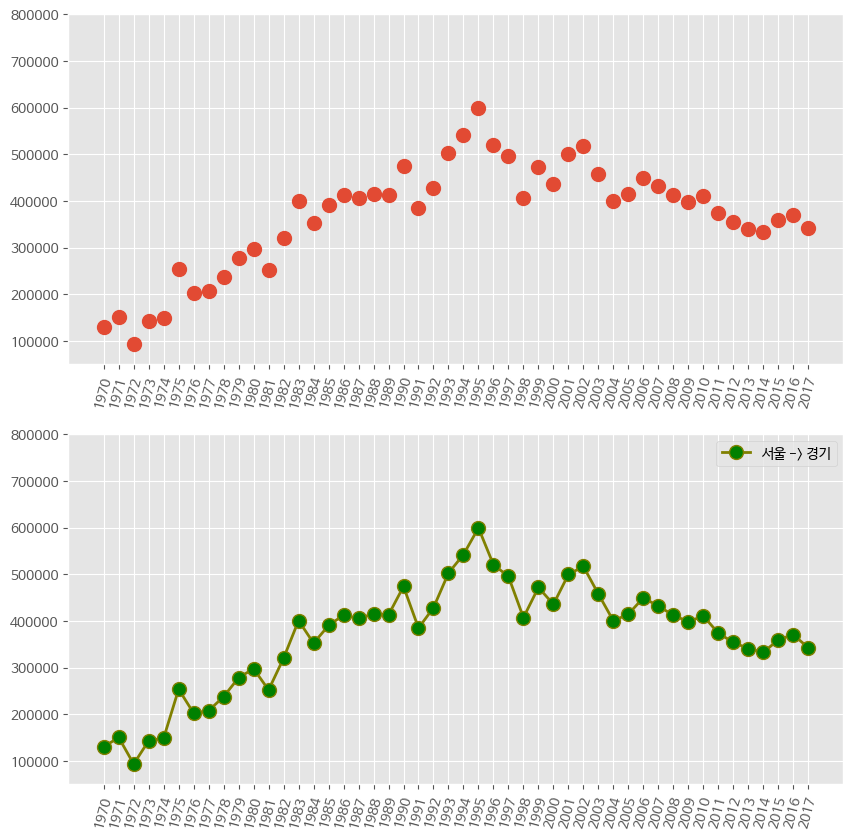

In [ ]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

<ipython-input-17-32bc7d1e2f2a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


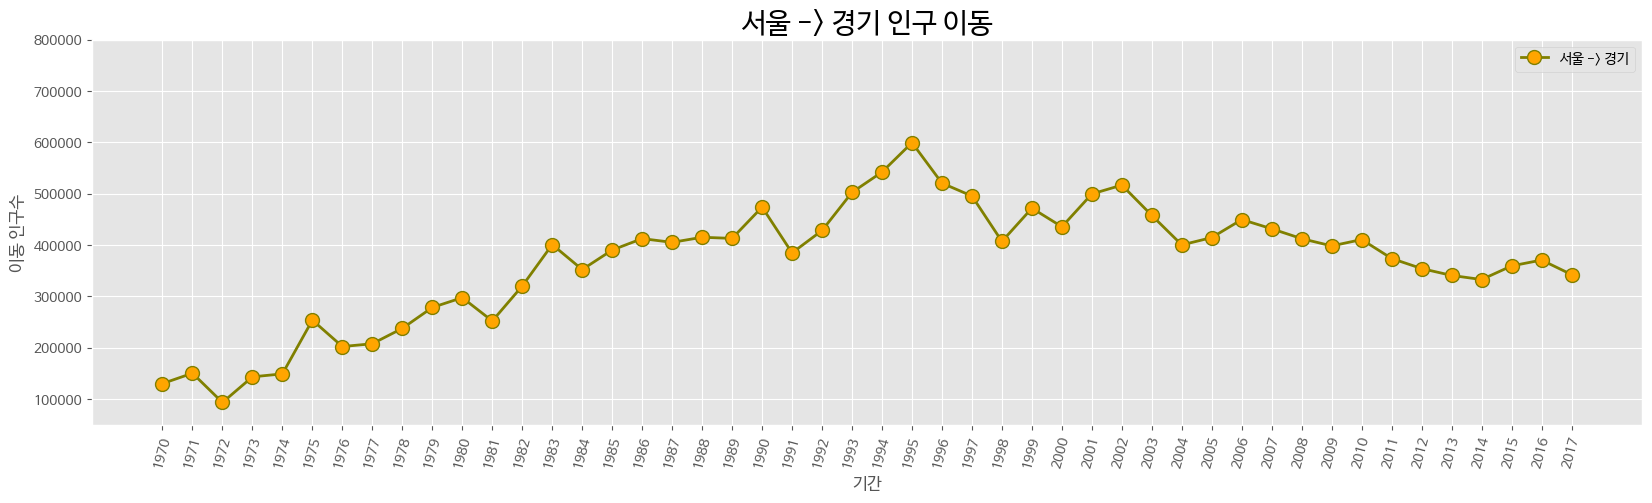

In [ ]:
# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

<ipython-input-18-7d2b470b3ec1>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


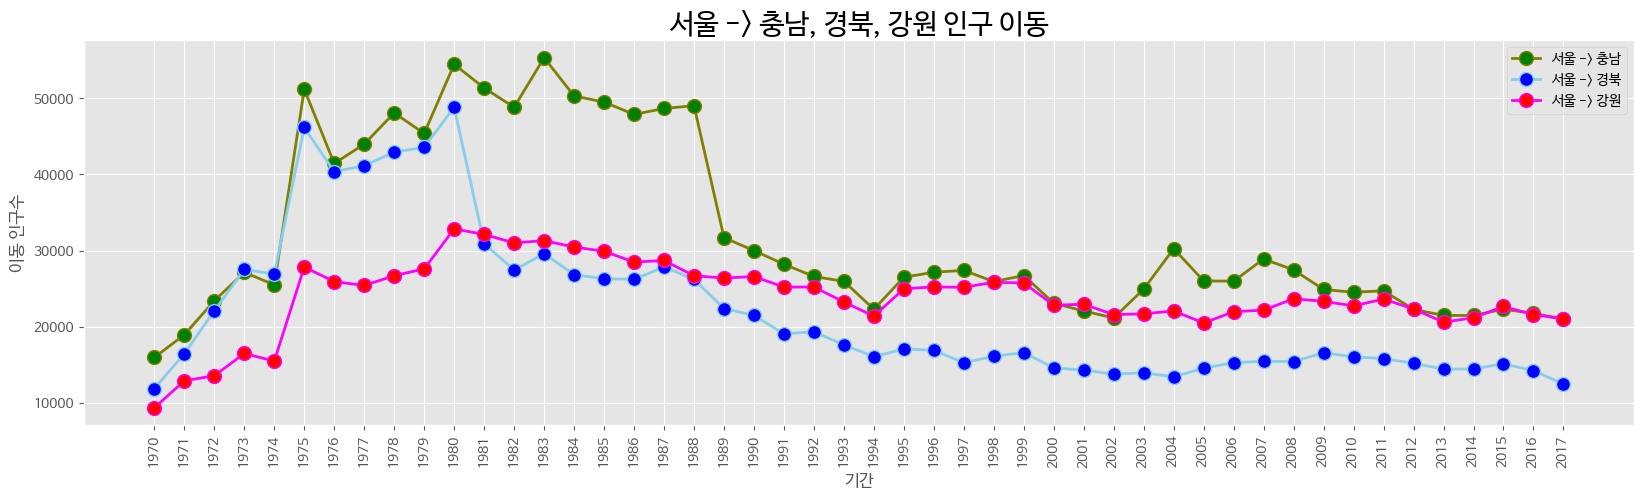

In [ ]:
# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

**화면 4분할 그래프**

axe 이용해서 화면 분할로 그래프 여러개 만들기

<ipython-input-19-3edfdb9604bc>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-19-3edfdb9604bc>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-19-3edfdb9604bc>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-19-3edfdb9604bc>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


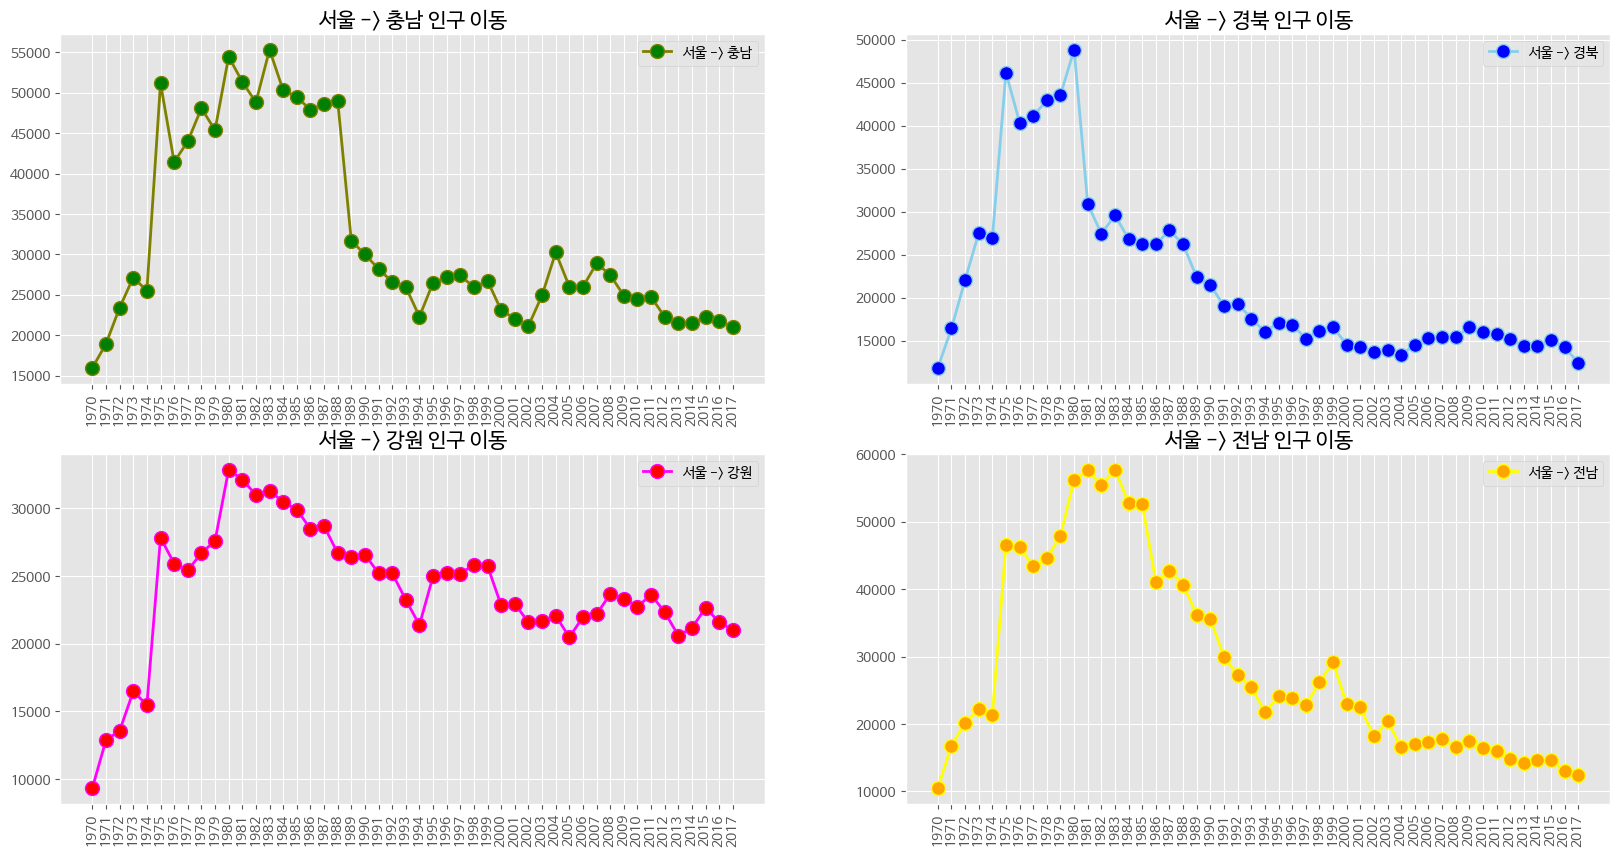

In [ ]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

**matplotlib** 스타일 리스트 출력

In [ ]:
# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in matplotlib.colors.cnames.items():
	colors[name] = hex

# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

**면적 그래프**

: 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색칠됨.
- plot() 메소드에 kind='area' 옵션을 추가하기
- stacked=True : 그래프를 누적(기본값)

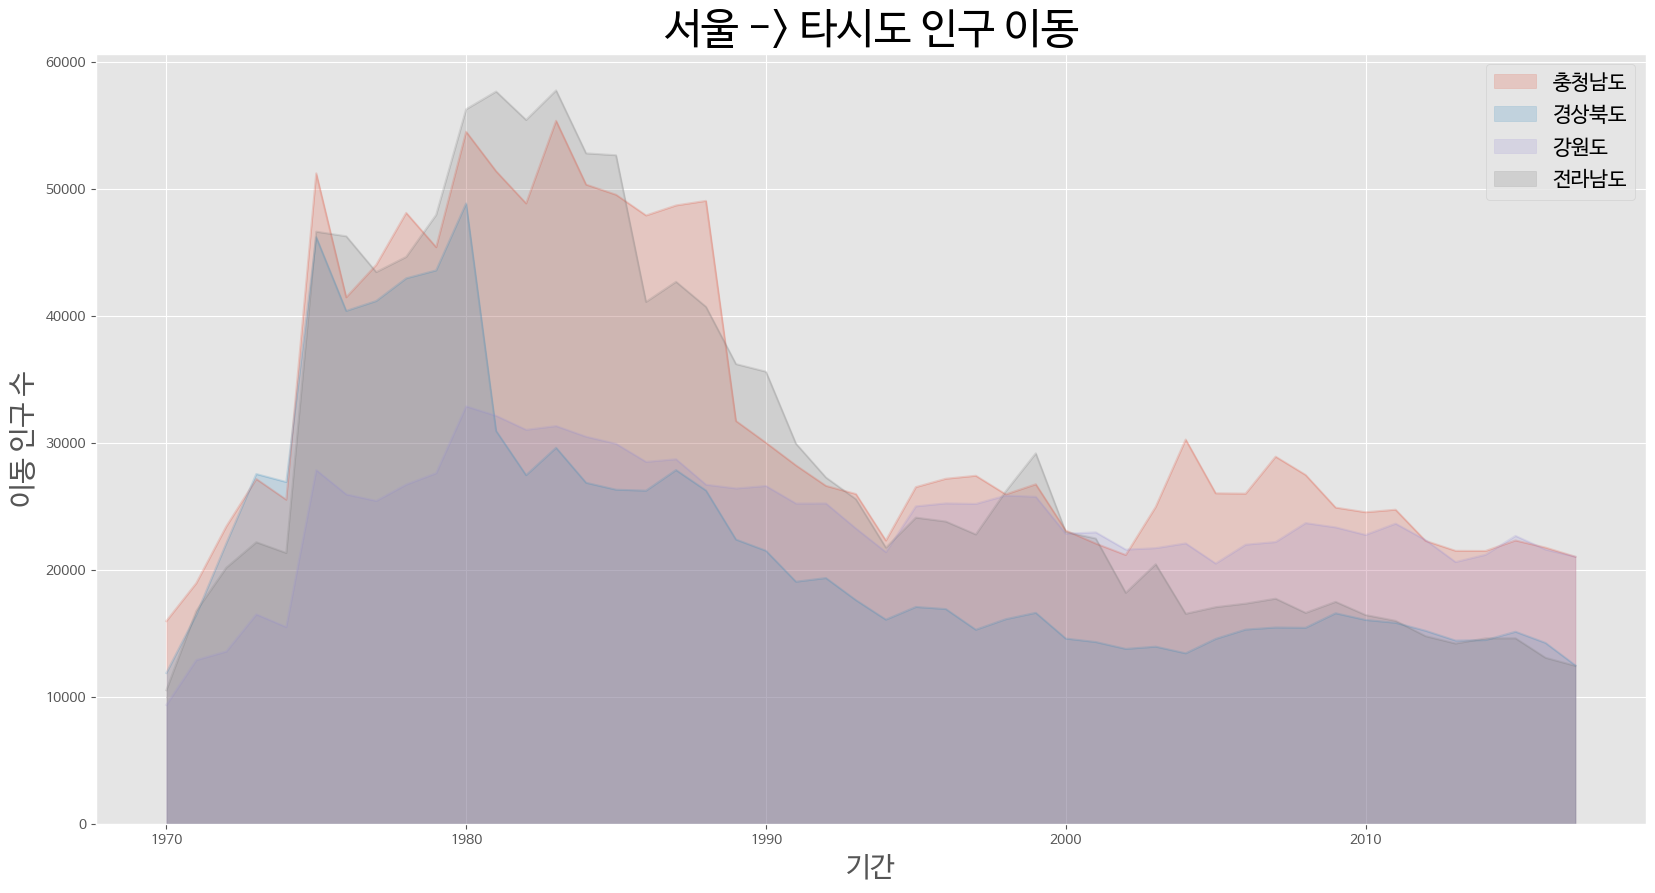

In [ ]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

**stacked=True** 옵션 지정하기

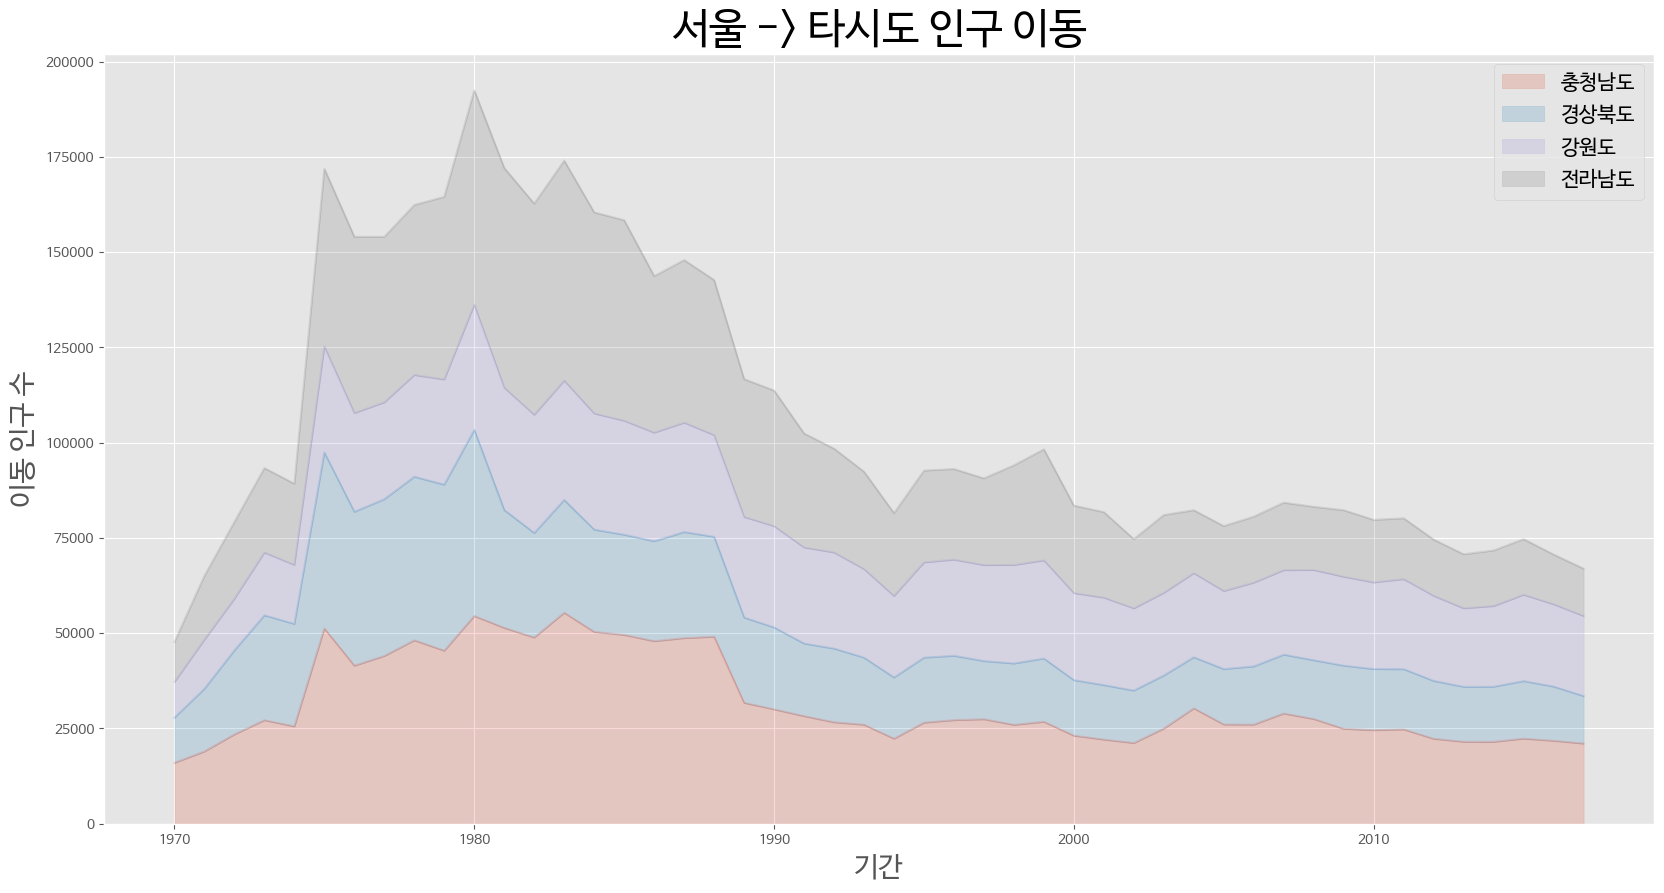

In [ ]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

**axes 객체 이용**

---
세부적인 요소 설정하기


<class 'matplotlib.axes._axes.Axes'>


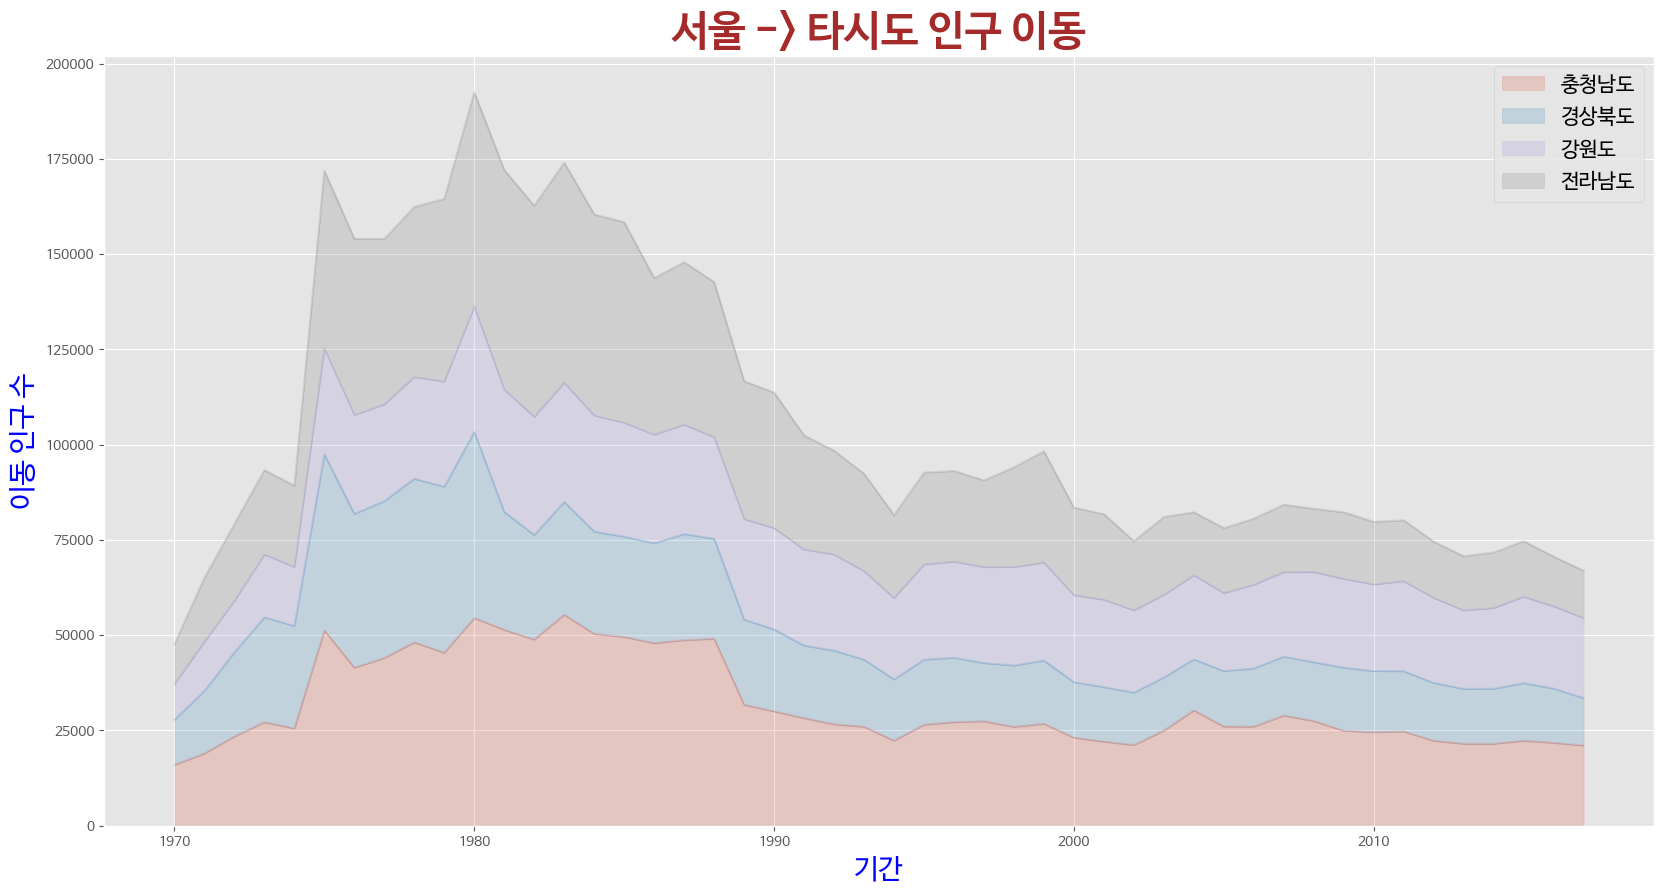

In [ ]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

**막대 그래프**

: 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
- plot() 메소드에 kind='bar' 입력
- 가로형 막대그래프 : kind='barh'

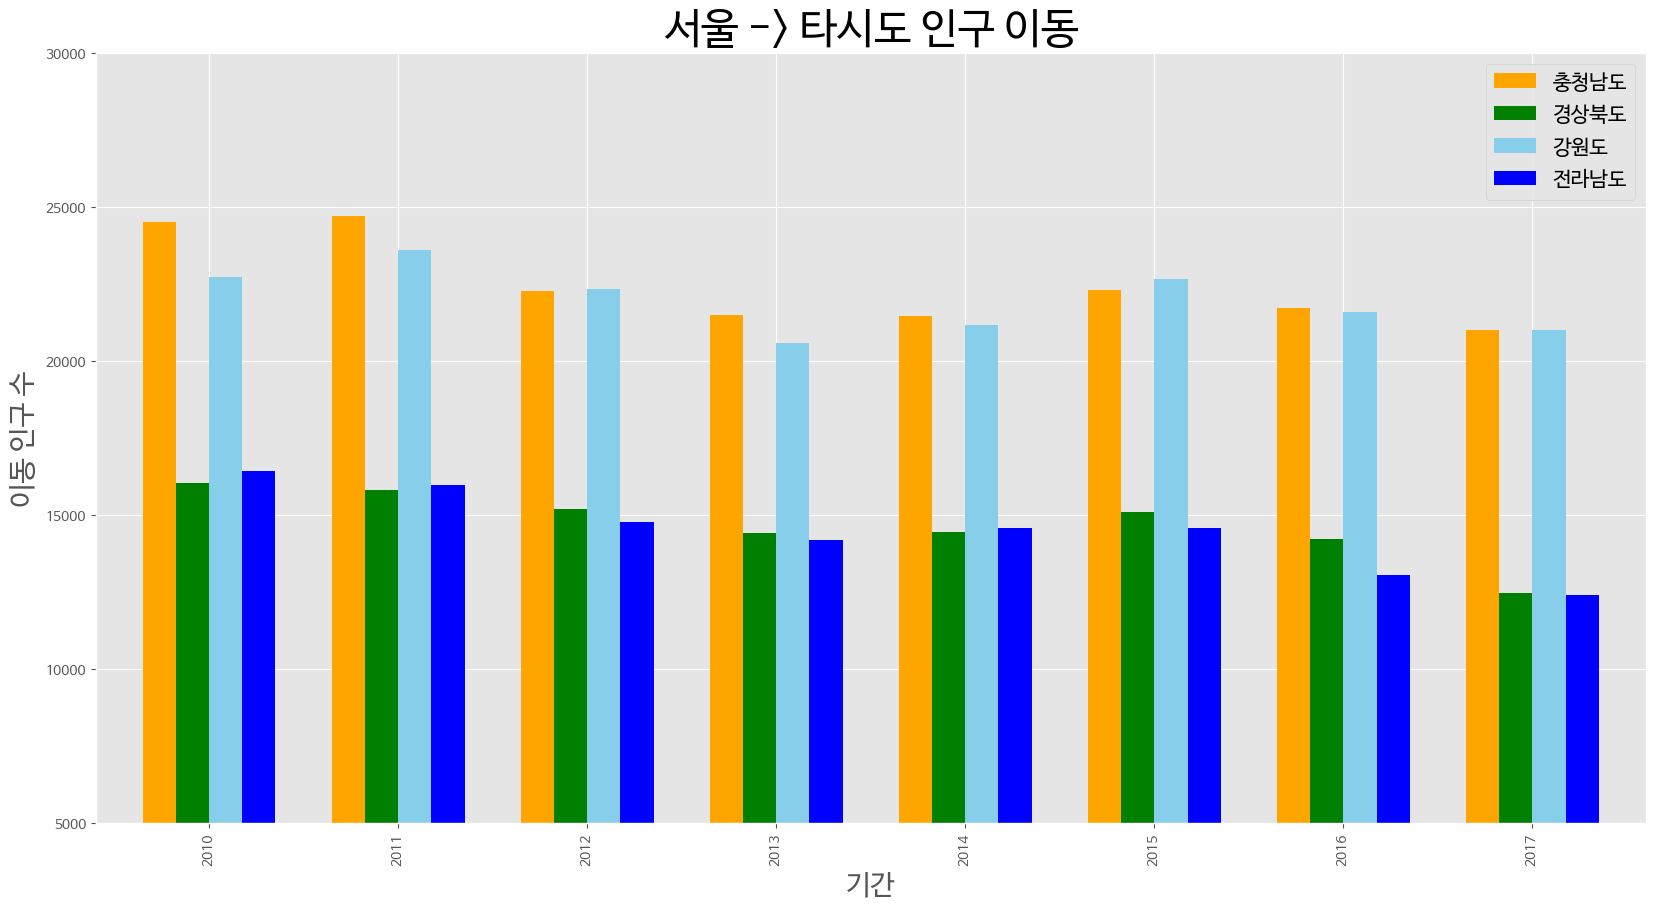

In [ ]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

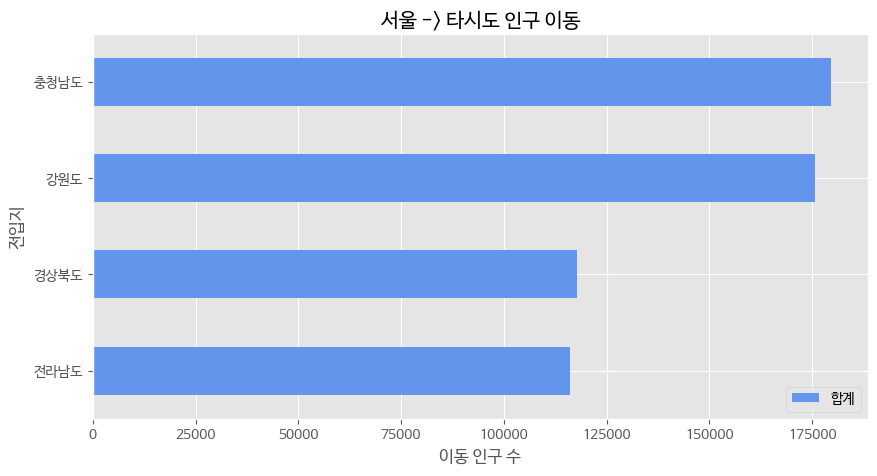

In [ ]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

<ipython-input-27-1d200fe66b9c>:5: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)


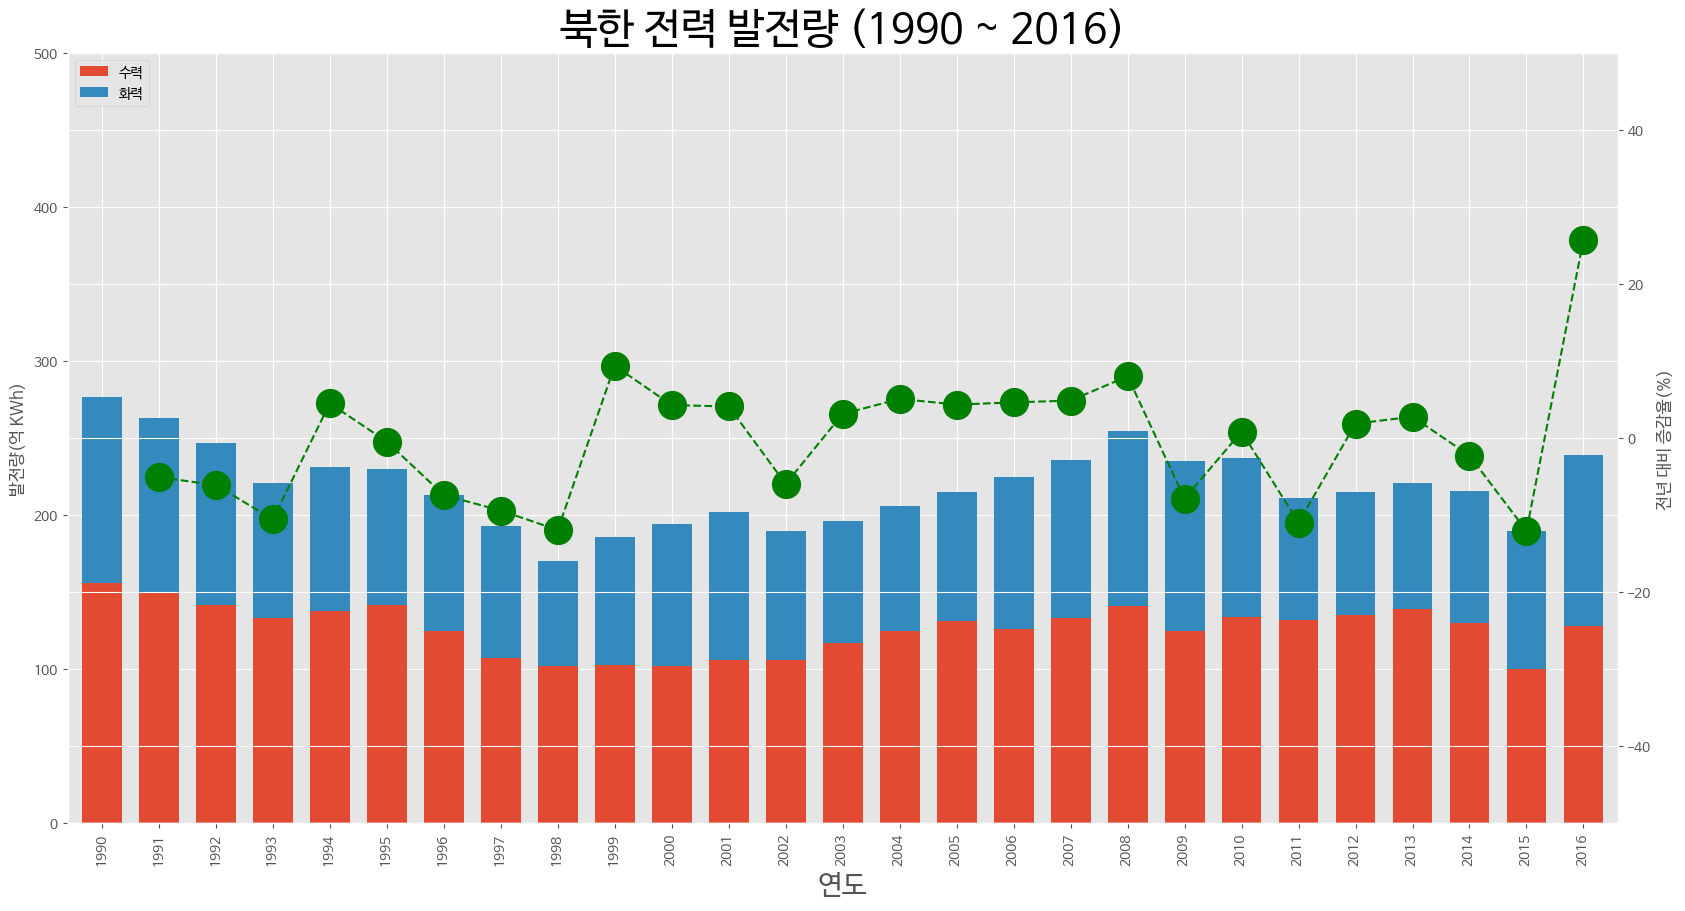

In [ ]:
plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,
         color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

**히스토그램**

: 변수가 하나인 단변수 데이터의 빈도수를 표현
- plot() 메소드에 kind='hist' 옵션 추가

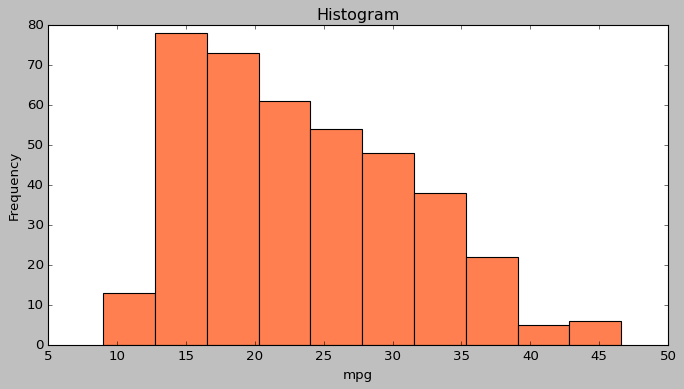

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

**산점도**

: 서로 다른 두 변수 사이의 관계
- plot() 메소드에 kind='scatter' 옵션
- x='weight' 옵션 사용하여 x축에 위치할 변수 선택
- y='mpg' 옵션 사용하여 y축에 놓을 변수 선택

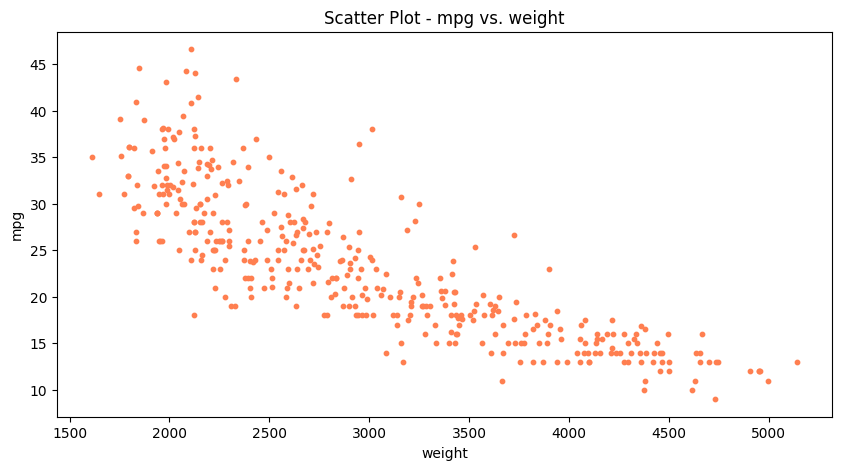

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

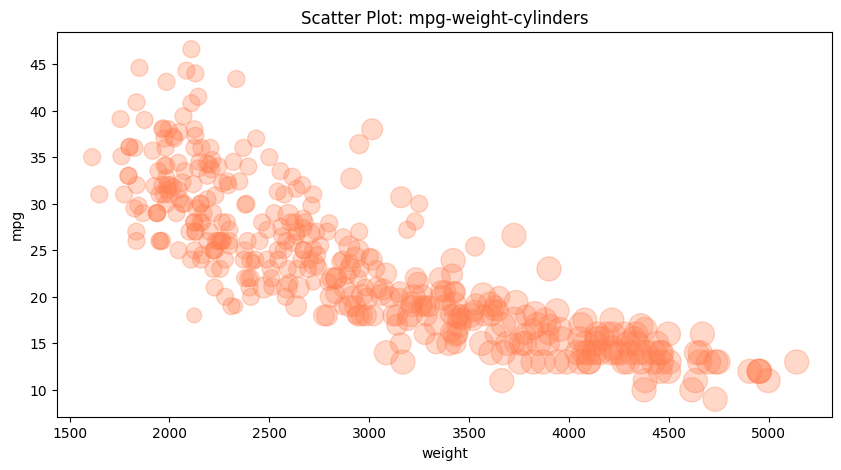

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

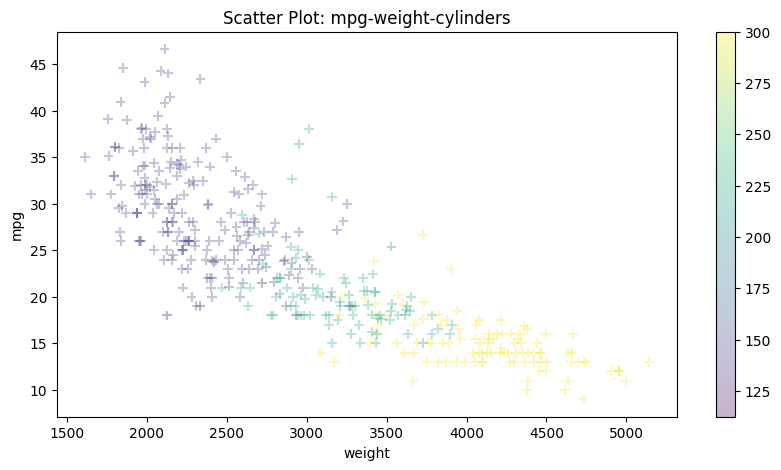

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show()

**파이 차트**

: 원을 파이 조각처럼 나누어서 표현
- plot() 메소드에 kind='pie'옵션 사용

<ipython-input-33-25a7fd21fb51>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산


           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


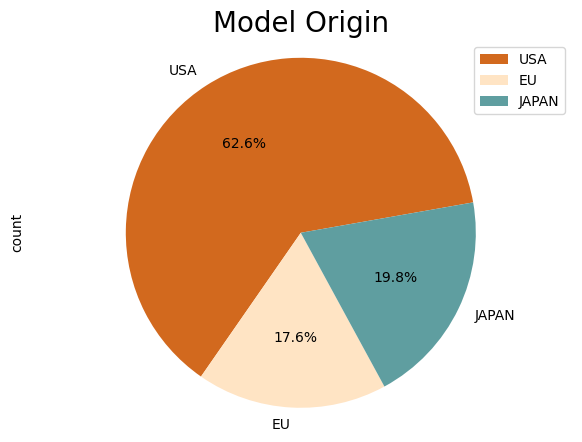

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/auto-mpg.csv', header=None)

plt.style.use('default')

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

**박스 플롯**

: 범주형 데이터의 분포를 파악하는데 적합
- 각 axe 객체에 boxplot() 메소드 적용

<ipython-input-34-8fb3c0af5890>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') #스타일 서식 지정


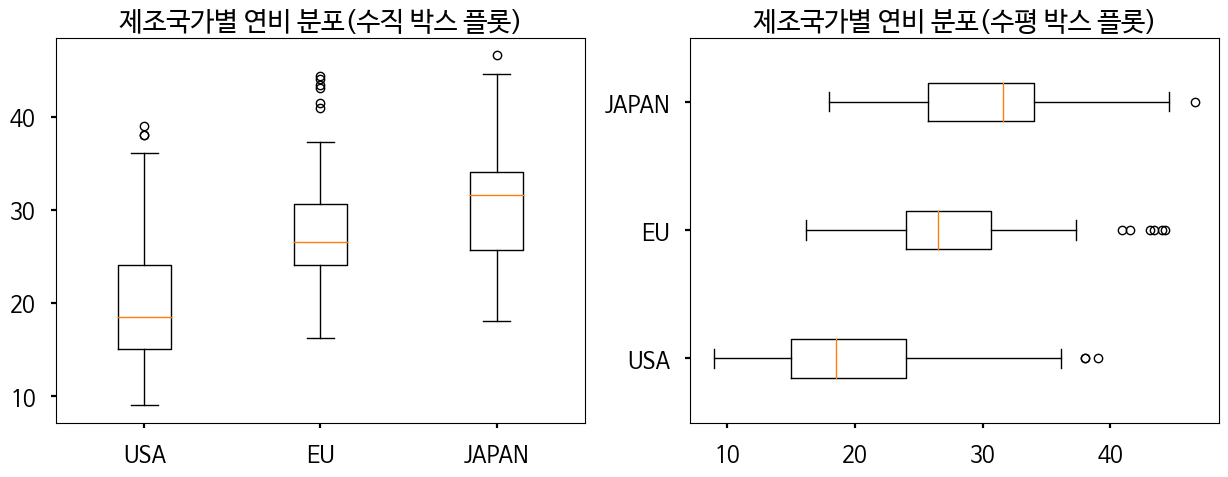

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#한글 폰트 오류 해결
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.style.use('seaborn-poster') #스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()